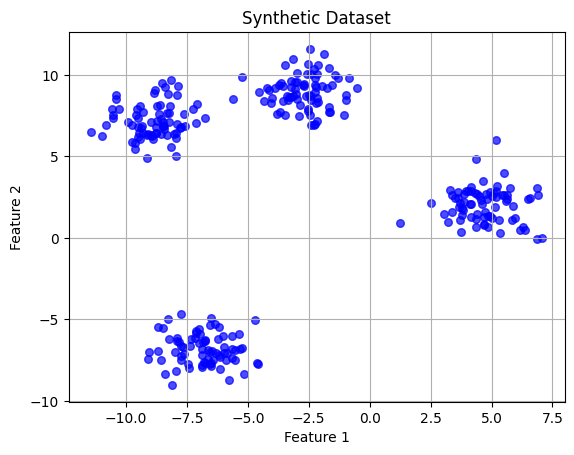

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.05, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=30, alpha=0.7)
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

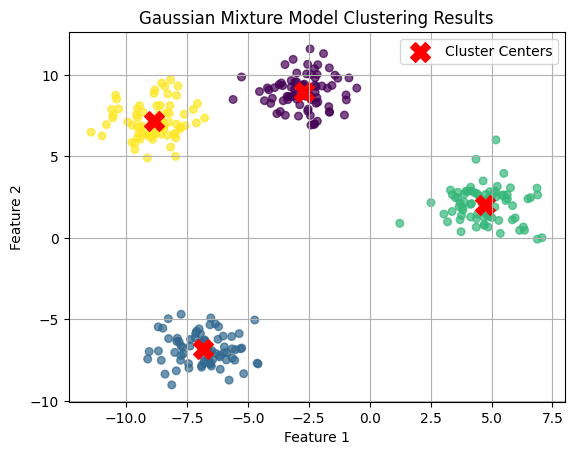

In [2]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=30, alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Gaussian Mixture Model Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

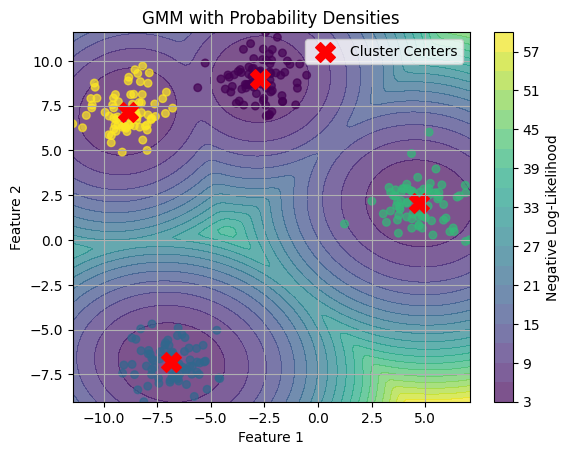

Silhouette Score: 0.7817044262725246
BIC Score: 2681.413076931195


In [3]:
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_mesh, Y_mesh = np.meshgrid(x, y)
XY_mesh = np.array([X_mesh.ravel(), Y_mesh.ravel()]).T
Z = -gmm.score_samples(XY_mesh)
Z = Z.reshape(X_mesh.shape)

plt.contourf(X_mesh, Y_mesh, Z, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(label='Negative Log-Likelihood')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=30, alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('GMM with Probability Densities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


silhouette_avg = silhouette_score(X, labels)
bic_score = gmm.bic(X)
print(f"Silhouette Score: {silhouette_avg}")
print(f"BIC Score: {bic_score}")